In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb

In [2]:
# Read the train data file
df = pd.read_csv(r'train_s3TEQDk.csv')


# EDA

In [3]:
# Understanding the training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [4]:
# One Hot Encoding
df = pd.get_dummies(df, columns =['Gender','Is_Active','Credit_Product','Channel_Code','Occupation','Region_Code'])
col = list(df.columns)

# Build Model

In [5]:
# define the dependent and independent variables
col_y = df['Is_Lead']
col_X = df.drop(['ID','Is_Lead'], axis =1)

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(col_X, col_y, test_size=0.3, random_state = 0) 



# LGBM Boost Model
model = lgb.LGBMClassifier()

model.fit(X_train, y_train)

# make predictions for test data split
y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))   

Accuracy: 86.12%


AUC: 0.874590099


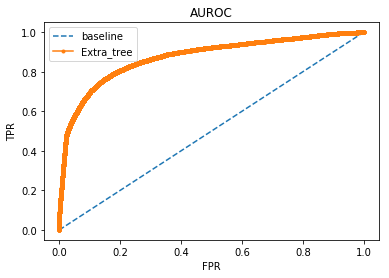

In [7]:
# AUC ROC
auc = roc_auc_score(y_test, y_pred_prob[:,1])
print('AUC: %.9f' % auc)
# calculate the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
# plot auroc
fig3 = plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--', label='baseline')
plt.plot(fpr, tpr, marker='.', label='Extra_tree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("AUROC")
plt.legend()
plt.show()

# Test data

In [8]:
# Read the test file
df_test = pd.read_csv(r'test_mSzZ8RL.csv')

In [9]:
# One Hot Encoding
df_test = pd.get_dummies(df_test, columns = ['Gender','Is_Active','Credit_Product','Channel_Code','Occupation','Region_Code'])
col_test = list(df_test.columns)

In [10]:
# Predict the target variable and the probabilities
X_test_data = df_test[col_test[1:]]
y_pred_test_data = model.predict(X_test_data)
y_pred_prob_test_data = model.predict_proba(X_test_data)

# write data to solution file
ids = list(df_test[col[0]])
probability = list(y_pred_prob_test_data[:,1])
df_out = pd.DataFrame(list(zip(ids,probability)), columns = ['ID', 'Is_Lead'])
df_out.to_csv('Final_solution_lgbm.csv', index = False)